<a href="https://colab.research.google.com/github/Risky-wali/tes/blob/main/Copy_of_Multiclass_Hand_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'asl-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F177084%2F399170%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T072349Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c354c63050e32afd5e9bedd5d02bf41e9670b52f438099e1c8170469e2034cc36722a963ae292859aa2154871fdf87b2ffb298b33c919e51dc1508176feaa9cc3b9153b5ecf6b88f7d1983f16e7c20f653fe80c500f89d3226f91be483dd91ed65b7cdd7963d072e7f1d7de3a0e6e63f9e9b9b9996848f02edb8a2e0510d2b35b746860eabe3507aab037940896d217f48fa806faf5b8dbb7b490d8730d6266dac19d9dfd824a2af4ba405212fe0ef7d72a61b3bce954c083ce74bff41d93b23a2b479d138571afa81fe2d02787f890044dd0ee0158b59c3d755bc20671aa2365d344d88a75107f6a05361b4215f41d61feed2ec6f696bdd4481f03e5624cba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 59642568 bytes downloaded
Downloaded and uncompressed: asl-dataset
Data source import complete.


## Introduction

![image.png](attachment:3f494d46-41c3-4cf9-848f-6c8cbb2efa2c.png)

Introducing a Kaggle notebook designed for a practical task: multiclass image classification of American hand signs. This notebook aims to efficiently categorize hand signs, making it a valuable resource for various applications.

If you are unfamilliar with image classification here's the plot of our notebook:

1. Getting Data
    * Data Visualisation
    * Spliting Data
    * Scaling Data (using ImageData Generator)
2. Building the model
3. Evaluating the model
4. Making Predictions

## Imports

In [ ]:
pip install split-folders


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import random

import numpy as np
import matplotlib.pyplot as plt

import splitfolders
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization

## Getting Data

### Data Samples

In this part we are going to extract an image of each class we have and plot it to visualise some samples of our data

In [ ]:
dir = "/kaggle/input/asl-dataset/asl_dataset/"
os.chdir(dir)
directories = os.listdir()
paths = []
for directory in directories:
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) >= 2:
        chosen_images = random.sample(image_files, 1)
        for image in chosen_images:
            image_path = os.path.join(dir + directory, image)
            paths.append(image_path)

In [ ]:
plt.figure(figsize=(40,40))
for i in range(36):
    img = plt.imread(paths[i])
    plt.subplot(6,6, i + 1)
    plt.imshow(img)
    plt.title(f"Image of {directories[i]}")
    plt.axis("off")

NameError: name 'plt' is not defined

In [ ]:
splitfolders.ratio('/kaggle/input/asl-dataset/asl_dataset', output="/kaggle/working/", seed=1337, ratio=(0.8, 0.2))

Copying files: 2515 files [00:00, 3210.90 files/s]


We have got an extra class with the name **asl_dataset** which is the main directory so we are going to remove it using the **shutil** library

In [ ]:
import shutil
shutil.rmtree("/kaggle/working/train/asl_dataset")
shutil.rmtree("/kaggle/working/val/asl_dataset")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/train/asl_dataset'

### Scaling Data With Image data generator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255
)
test_gen = ImageDataGenerator(rescale = 1.0 / 255)

NameError: name 'ImageDataGenerator' is not defined

### Getting Data with flow from directory

In [ ]:
train_generator = datagen.flow_from_directory(
    "/kaggle/working/train",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical",
)
validation_generator = test_gen.flow_from_directory(
    "/kaggle/working/val",
    batch_size = 32,
    target_size = (150,150),
    class_mode = "categorical",
    shuffle = False,
)

NameError: name 'datagen' is not defined

## Building Model

In [ ]:
model = Sequential([
    Conv2D(input_shape=(150,150,3),filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),
    Conv2D(64,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),
    Conv2D(128,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),
    Conv2D(256,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(512,kernel_size=(3,3),padding = 'same',activation='relu'),
    MaxPool2D(),

    Flatten(name='flatten'),
    Dense(36, activation = 'softmax')

])
model.summary()

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history = model.fit(train_generator, steps_per_epoch = 2012 // 32,
                    validation_steps = 503 // 32,
                    epochs = 100,
                    validation_data = validation_generator,
                   callbacks=[early_stopping])

NameError: name 'EarlyStopping' is not defined

## Evaluating The Model

### Accuracy Score

In [ ]:
evaluation_results = model.evaluate(validation_generator)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

NameError: name 'model' is not defined

### F1 Score

In [ ]:
from sklearn.metrics import f1_score

predIdxs = model.predict_generator(validation_generator)

predIdxs = np.argmax(predIdxs, axis=1)

print(f1_score(validation_generator.labels, predIdxs, average='micro'))

0.7226640159045724


### Accuracy Visualisation

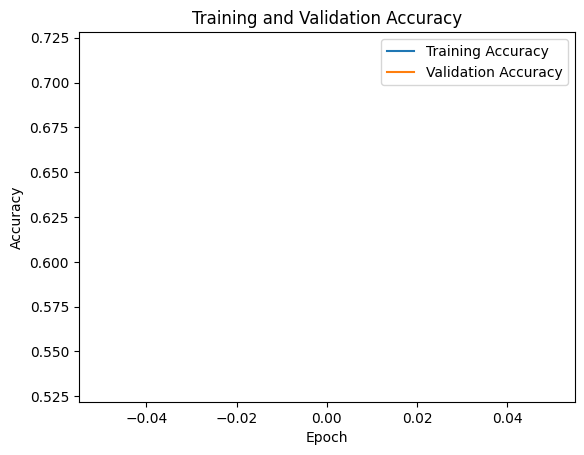

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Samples Visualisation

In [ ]:
directories= [str(i) for i in range(10)]
l=[]
for x in range(26):
    l.append(chr(x+97))
directories = directories + l

In [ ]:
dir = "/kaggle/input/asl-dataset/asl_dataset/"
paths = []
labels = []
for directory in directories:
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) >= 2:
        chosen_images = random.sample(image_files, 1)
        for image in chosen_images:
            labels.append(directory)
            image_path = os.path.join(dir + directory, image)
            paths.append(image_path)

In [ ]:
from tensorflow.keras.preprocessing import image
plt.figure(figsize=(40,40))
for i in range(36):
    img = image.load_img(paths[i], target_size=(150, 150))
    plt.subplot(6,6, i + 1)
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    plt.title(f"Image of {labels[np.argmax(predictions)]}")
    plt.axis("off")

NameError: name 'plt' is not defined